# Crime_data

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [3]:
from google.colab import files
uploaded=files.upload()

Saving crime_data.csv to crime_data.csv


In [4]:
df=pd.read_csv("crime_data.csv")
df

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


# Hierachical clustering

In [6]:
# Normalization function # use sklearn library norm
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return x

In [7]:
# Normalized data frame (considering the numerical part of data)
df_norm = norm_func(df.iloc[:,1:])

In [8]:
df_norm

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465
5,0.427711,0.544521,0.779661,0.811370
6,0.150602,0.222603,0.762712,0.098191
7,0.307229,0.660959,0.677966,0.219638
8,0.879518,0.993151,0.813559,0.635659
9,1.000000,0.568493,0.474576,0.478036


 create dendrogram

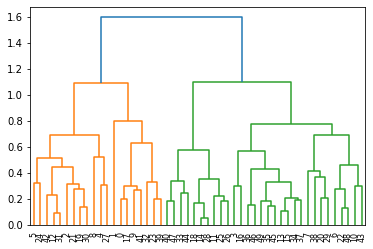

In [9]:
dendrogram = sch.dendrogram(sch.linkage(df_norm, method='complete'))

In [10]:
hc = AgglomerativeClustering(n_clusters=4, affinity = 'euclidean', linkage = 'complete')

In [11]:
hc.fit(df_norm)

AgglomerativeClustering(linkage='complete', n_clusters=4)

In [12]:
# save clusters for chart
y_hc = hc.fit_predict(df_norm)

In [13]:
y_hc

array([0, 0, 3, 1, 3, 3, 1, 1, 3, 0, 1, 2, 3, 1, 2, 1, 1, 0, 2, 3, 1, 3,
       1, 0, 3, 2, 2, 3, 2, 1, 3, 3, 0, 2, 1, 1, 1, 1, 1, 0, 2, 0, 3, 1,
       2, 1, 1, 2, 1, 1])

In [14]:
df['h_clusterid']=y_hc

In [15]:
df.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,h_clusterid
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,0
2,Arizona,8.1,294,80,31.0,3
3,Arkansas,8.8,190,50,19.5,1
4,California,9.0,276,91,40.6,3


In [16]:
df1 = df.sort_values('h_clusterid')
df1.iloc[:,[0,-1]]

,Unnamed: 0,h_clusterid
0,Alabama,0
17,Louisiana,0
23,Mississippi,0
32,North Carolina,0
39,South Carolina,0
9,Georgia,0
1,Alaska,0
41,Tennessee,0
43,Utah,1
38,Rhode Island,1


# kMeans

In [17]:
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df.iloc[:,1:])

In [18]:
scaled_df

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116, -1.48365074],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392, -1.48365074],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626,  1.4446073 ],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398, -0.50756473],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393,  1.4446073 ],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137,  1.4446073 ],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319, -0.50756473],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422, -0.50756473],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ,  1.4446073 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293, -1.48365074],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987, -0.50756473],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217,  0.46852129],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525,  1.4446073 ],
       [-0.13637203, -0.70012057, -0.0

In [19]:
# How to find optimum number of  cluster
#The K-means algorithm aims to choose centroids that minimise the inertia, or within-cluster sum-of-squares criterion:

In [20]:
kmeans = KMeans(n_clusters=4,random_state=0)
predict=kmeans.fit_predict(scaled_df)

In [21]:
predict

array([2, 2, 1, 2, 1, 1, 0, 0, 1, 2, 0, 3, 1, 0, 3, 0, 0, 2, 3, 1, 0, 1,
       0, 2, 1, 3, 3, 1, 3, 0, 1, 1, 2, 3, 0, 0, 0, 0, 0, 2, 3, 2, 1, 0,
       3, 0, 0, 3, 0, 0], dtype=int32)

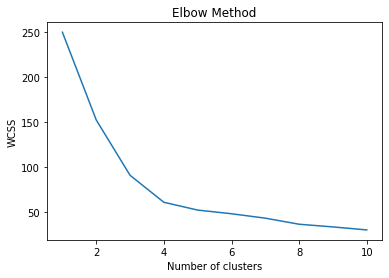

In [22]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(scaled_df)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [23]:
#Build Cluster algorithm
clusters_new = KMeans(3, random_state=0)
clusters_new.fit(scaled_df)

KMeans(n_clusters=3, random_state=0)

In [24]:
clusters_new.labels_

array([2, 2, 1, 0, 1, 1, 0, 0, 1, 2, 0, 0, 1, 0, 0, 0, 0, 2, 0, 1, 0, 1,
       0, 2, 1, 0, 0, 1, 0, 0, 1, 1, 2, 0, 0, 0, 0, 0, 0, 2, 0, 2, 1, 0,
       0, 0, 0, 0, 0, 0], dtype=int32)

In [25]:
#Assign clusters to the data set
df['clusterid_new'] = clusters_new.labels_

In [26]:
df

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,h_clusterid,clusterid_new
0,Alabama,13.2,236,58,21.2,0,2
1,Alaska,10.0,263,48,44.5,0,2
2,Arizona,8.1,294,80,31.0,3,1
3,Arkansas,8.8,190,50,19.5,1,0
4,California,9.0,276,91,40.6,3,1
5,Colorado,7.9,204,78,38.7,3,1
6,Connecticut,3.3,110,77,11.1,1,0
7,Delaware,5.9,238,72,15.8,1,0
8,Florida,15.4,335,80,31.9,3,1
9,Georgia,17.4,211,60,25.8,0,2


In [27]:
#these are standardized values.
clusters_new.cluster_centers_

array([[-0.67675778, -0.68274685, -0.13306084, -0.57037591, -0.18220272],
       [ 0.71788585,  1.04432228,  0.89281033,  1.18827715,  1.4446073 ],
       [ 1.4610129 ,  0.99381728, -0.84023734,  0.35649393, -1.48365074]])

In [28]:
df.groupby('clusterid_new').agg(['mean']).reset_index()

,clusterid_new,Murder,Assault,UrbanPop,Rape,h_clusterid
,,mean,mean,mean,mean,mean
0,0,4.870000,114.433333,63.633333,15.943333,1.333333
1,1,10.883333,256.916667,78.333333,32.250000,3.000000
2,2,14.087500,252.750000,53.500000,24.537500,0.000000


In [29]:
df[df['clusterid_new']==0]

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,h_clusterid,clusterid_new
3,Arkansas,8.8,190,50,19.5,1,0
6,Connecticut,3.3,110,77,11.1,1,0
7,Delaware,5.9,238,72,15.8,1,0
10,Hawaii,5.3,46,83,20.2,1,0
11,Idaho,2.6,120,54,14.2,2,0
13,Indiana,7.2,113,65,21.0,1,0
14,Iowa,2.2,56,57,11.3,2,0
15,Kansas,6.0,115,66,18.0,1,0
16,Kentucky,9.7,109,52,16.3,1,0
18,Maine,2.1,83,51,7.8,2,0


In [30]:
df[df['clusterid_new']==1]

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,h_clusterid,clusterid_new
2,Arizona,8.1,294,80,31.0,3,1
4,California,9.0,276,91,40.6,3,1
5,Colorado,7.9,204,78,38.7,3,1
8,Florida,15.4,335,80,31.9,3,1
12,Illinois,10.4,249,83,24.0,3,1
19,Maryland,11.3,300,67,27.8,3,1
21,Michigan,12.1,255,74,35.1,3,1
24,Missouri,9.0,178,70,28.2,3,1
27,Nevada,12.2,252,81,46.0,3,1
30,New Mexico,11.4,285,70,32.1,3,1


In [31]:
df[df['clusterid_new']==2]

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,h_clusterid,clusterid_new
0,Alabama,13.2,236,58,21.2,0,2
1,Alaska,10.0,263,48,44.5,0,2
9,Georgia,17.4,211,60,25.8,0,2
17,Louisiana,15.4,249,66,22.2,0,2
23,Mississippi,16.1,259,44,17.1,0,2
32,North Carolina,13.0,337,45,16.1,0,2
39,South Carolina,14.4,279,48,22.5,0,2
41,Tennessee,13.2,188,59,26.9,0,2


# DBSCAN

In [32]:
crime=pd.read_csv("crime_data.csv")
crime

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [33]:
crime.drop(['Unnamed: 0'],axis=1,inplace=True)

In [34]:
crime.head()

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6


In [35]:
array=crime.values

In [36]:
array

array([[ 13.2, 236. ,  58. ,  21.2],
       [ 10. , 263. ,  48. ,  44.5],
       [  8.1, 294. ,  80. ,  31. ],
       [  8.8, 190. ,  50. ,  19.5],
       [  9. , 276. ,  91. ,  40.6],
       [  7.9, 204. ,  78. ,  38.7],
       [  3.3, 110. ,  77. ,  11.1],
       [  5.9, 238. ,  72. ,  15.8],
       [ 15.4, 335. ,  80. ,  31.9],
       [ 17.4, 211. ,  60. ,  25.8],
       [  5.3,  46. ,  83. ,  20.2],
       [  2.6, 120. ,  54. ,  14.2],
       [ 10.4, 249. ,  83. ,  24. ],
       [  7.2, 113. ,  65. ,  21. ],
       [  2.2,  56. ,  57. ,  11.3],
       [  6. , 115. ,  66. ,  18. ],
       [  9.7, 109. ,  52. ,  16.3],
       [ 15.4, 249. ,  66. ,  22.2],
       [  2.1,  83. ,  51. ,   7.8],
       [ 11.3, 300. ,  67. ,  27.8],
       [  4.4, 149. ,  85. ,  16.3],
       [ 12.1, 255. ,  74. ,  35.1],
       [  2.7,  72. ,  66. ,  14.9],
       [ 16.1, 259. ,  44. ,  17.1],
       [  9. , 178. ,  70. ,  28.2],
       [  6. , 109. ,  53. ,  16.4],
       [  4.3, 102. ,  62. ,  16.5],
 

In [37]:
stscaler = StandardScaler()
X = stscaler.fit_transform(array)

In [38]:
X

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

In [39]:
dbscan = DBSCAN(eps=1, min_samples=4)
dbscan.fit_predict(X)

array([ 0, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1,  1, -1,  1,  1,  1,  1,
        0,  1, -1,  1, -1,  1, -1,  1,  1,  1, -1,  1,  1, -1, -1, -1,  1,
        1,  1,  1,  1,  1,  0,  1,  0, -1,  1,  1,  1,  1,  1,  1,  1])

In [40]:
#Noisy samples are given the label -1.
dbscan.labels_

array([ 0, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1,  1, -1,  1,  1,  1,  1,
        0,  1, -1,  1, -1,  1, -1,  1,  1,  1, -1,  1,  1, -1, -1, -1,  1,
        1,  1,  1,  1,  1,  0,  1,  0, -1,  1,  1,  1,  1,  1,  1,  1])

In [41]:
cl=pd.DataFrame(dbscan.labels_,columns=['cluster'])
cl

,cluster
0,0
1,-1
2,-1
3,-1
4,-1
5,-1
6,1
7,-1
8,-1
9,-1


In [42]:
clustered = pd.concat([crime,cl],axis=1)

In [43]:
clustered

,Murder,Assault,UrbanPop,Rape,cluster
0,13.2,236,58,21.2,0
1,10.0,263,48,44.5,-1
2,8.1,294,80,31.0,-1
3,8.8,190,50,19.5,-1
4,9.0,276,91,40.6,-1
5,7.9,204,78,38.7,-1
6,3.3,110,77,11.1,1
7,5.9,238,72,15.8,-1
8,15.4,335,80,31.9,-1
9,17.4,211,60,25.8,-1


In [44]:
clustered[clustered['cluster']==-1]

,Murder,Assault,UrbanPop,Rape,cluster
1,10.0,263,48,44.5,-1
2,8.1,294,80,31.0,-1
3,8.8,190,50,19.5,-1
4,9.0,276,91,40.6,-1
5,7.9,204,78,38.7,-1
7,5.9,238,72,15.8,-1
8,15.4,335,80,31.9,-1
9,17.4,211,60,25.8,-1
10,5.3,46,83,20.2,-1
12,10.4,249,83,24.0,-1


In [45]:
clustered[clustered['cluster']==0]

,Murder,Assault,UrbanPop,Rape,cluster
0,13.2,236,58,21.2,0
17,15.4,249,66,22.2,0
39,14.4,279,48,22.5,0
41,13.2,188,59,26.9,0


In [46]:
clustered[clustered['cluster']==1]

,Murder,Assault,UrbanPop,Rape,cluster
6,3.3,110,77,11.1,1
11,2.6,120,54,14.2,1
13,7.2,113,65,21.0,1
14,2.2,56,57,11.3,1
15,6.0,115,66,18.0,1
16,9.7,109,52,16.3,1
18,2.1,83,51,7.8,1
20,4.4,149,85,16.3,1
22,2.7,72,66,14.9,1
24,9.0,178,70,28.2,1


# Airlines

In [96]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [97]:
from google.colab import files
uploaded=files.upload()

Saving EastWestAirlines.xlsx to EastWestAirlines (1).xlsx


In [98]:
airlines=pd.read_excel("EastWestAirlines.xlsx", sheet_name='data')

In [99]:
airlines

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [51]:
airlines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [100]:
airlines1=airlines.drop(['ID#'],axis=1)
airlines1

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1
3995,64385,0,1,1,1,981,5,0,0,1395,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1
3997,54899,0,1,1,1,500,1,500,1,1401,0


# Heirarcical clustering

In [101]:
# Normalization function # use sklearn library norm
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return x

In [102]:
airlines1_norm=norm_func(airlines1.iloc[:,0:])

In [103]:
airlines1_norm

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0
...,...,...,...,...,...,...,...,...,...,...,...
3994,0.010837,0.0,0.00,0.0,0.0,0.032330,0.046512,0.006490,0.018868,0.168917,1.0
3995,0.037766,0.0,0.00,0.0,0.0,0.003720,0.058140,0.000000,0.000000,0.167953,1.0
3996,0.043169,0.0,0.50,0.0,0.0,0.096505,0.093023,0.000000,0.000000,0.168797,1.0
3997,0.032202,0.0,0.00,0.0,0.0,0.001896,0.011628,0.016225,0.018868,0.168676,0.0


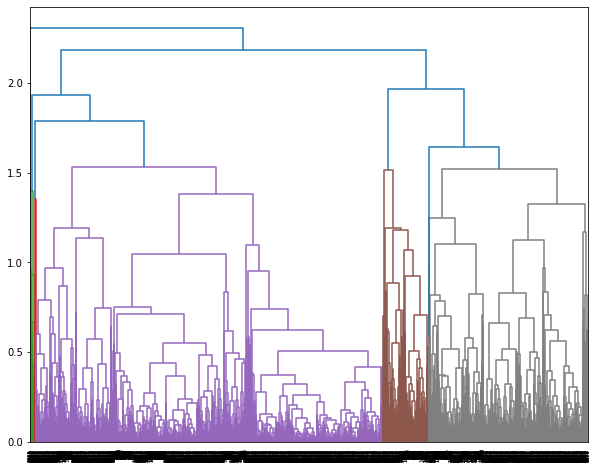

In [56]:
plt.figure(figsize=(10, 8))  
dendograms=sch.dendrogram(sch.linkage(airlines1_norm,'complete'))


In [104]:
hc = AgglomerativeClustering(n_clusters=5, affinity = 'euclidean', linkage = 'complete')

In [105]:
hc.fit(airlines1_norm)

AgglomerativeClustering(linkage='complete', n_clusters=5)

In [106]:
# save clusters for chart
y_hc = hc.fit_predict(airlines1_norm)

In [107]:
y_hc

array([0, 0, 0, ..., 2, 0, 0])

In [109]:
airlines1['h_clusterid']=y_hc

In [110]:
airlines1.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_clusterid
0,28143,0,1,1,1,174,1,0,0,7000,0,0
1,19244,0,1,1,1,215,2,0,0,6968,0,0
2,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,14776,0,1,1,1,500,1,0,0,6952,0,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1,1


In [111]:
airlines2 = airlines1.sort_values('h_clusterid')
airlines2.iloc[:,[0,-1]]

,Balance,h_clusterid
0,28143,0
2485,23649,0
2487,169794,0
2488,23781,0
2491,5970,0
...,...,...
940,44824,4
3959,13942,4
3779,35850,4
1389,49145,4


# KMeans

In [112]:
scaler = StandardScaler()
scaled_df = scaler.fit_transform(airlines1.iloc[:,0:])

In [113]:
scaled_df

array([[-4.51140783e-01, -1.86298687e-01, -7.69578406e-01, ...,
         1.39545434e+00, -7.66919299e-01, -7.30291870e-01],
       [-5.39456874e-01, -1.86298687e-01, -7.69578406e-01, ...,
         1.37995704e+00, -7.66919299e-01, -7.30291870e-01],
       [-3.20031232e-01, -1.86298687e-01, -7.69578406e-01, ...,
         1.41192021e+00, -7.66919299e-01, -7.30291870e-01],
       ...,
       [-4.29480975e-05, -1.86298687e-01,  6.83121167e-01, ...,
        -1.31560393e+00,  1.30391816e+00,  1.39443508e+00],
       [-1.85606976e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -1.31608822e+00, -7.66919299e-01, -7.30291870e-01],
       [-7.00507951e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -1.31754109e+00, -7.66919299e-01, -7.30291870e-01]])

In [114]:
# How to find optimum number of  cluster
#The K-means algorithm aims to choose centroids that minimise the inertia, or within-cluster sum-of-squares criterion:

In [115]:
kmeans = KMeans(n_clusters=4,random_state=0)
predict=kmeans.fit_predict(scaled_df)

In [116]:
predict

array([1, 1, 1, ..., 0, 1, 1], dtype=int32)

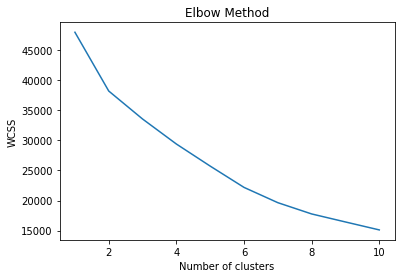

In [117]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(scaled_df)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [118]:
#Build Cluster algorithm
clusters_new = KMeans(5, random_state=0)
clusters_new.fit(scaled_df)

KMeans(n_clusters=5, random_state=0)

In [119]:
clusters_new.labels_

array([0, 0, 0, ..., 2, 0, 0], dtype=int32)

In [120]:
#Assign clusters to the data set
airlines1['clusterid_new'] = clusters_new.labels_

In [121]:
airlines1

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_clusterid,clusterid_new
0,28143,0,1,1,1,174,1,0,0,7000,0,0,0
1,19244,0,1,1,1,215,2,0,0,6968,0,0,0
2,41354,0,1,1,1,4123,4,0,0,7034,0,0,0
3,14776,0,1,1,1,500,1,0,0,6952,0,0,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,2,2
3995,64385,0,1,1,1,981,5,0,0,1395,1,2,2
3996,73597,0,3,1,1,25447,8,0,0,1402,1,2,2
3997,54899,0,1,1,1,500,1,500,1,1401,0,0,0


In [122]:
#these are standardized values.
clusters_new.cluster_centers_

array([[-0.29003338, -0.07332646, -0.52734744, -0.09824189, -0.06034687,
        -0.50297085, -0.44681718, -0.21256384, -0.23376062, -0.22448872,
        -0.7669193 , -0.73029187],
       [ 0.80087863, -0.02076224,  1.59132119, -0.08843927, -0.04794018,
         1.46166553,  0.89732103, -0.04631325, -0.04928086,  0.53908995,
         0.26100725, -0.10917053],
       [-0.12004817,  0.03533125, -0.02085788,  0.24728387, -0.06276658,
        -0.08889471,  0.05057831, -0.04327747, -0.0368378 ,  0.05966366,
         1.2540905 ,  1.45476178],
       [ 1.28268449,  0.979096  ,  0.16884431,  0.09952771, -0.06276658,
         0.72587331,  1.80724874,  3.84281759,  4.1336012 ,  0.2711156 ,
         0.98649052,  0.83611267],
       [ 0.63971926, -0.08443292,  1.0220844 , -0.09824189, 15.64629931,
         3.17969131,  1.71461374,  0.03329269,  0.05969539,  0.23987261,
         0.33752735, -0.30534648]])

In [123]:
airlines1.groupby('clusterid_new').agg(['mean']).reset_index()

,clusterid_new,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_clusterid
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,44427.172170,87.267925,1.336321,1.000000,1.000472,5025.288208,7.325000,162.465094,0.486792,3656.507075,0.000000,0.000000
1,1,154265.381159,130.398551,4.253623,1.001449,1.002899,52534.014493,20.262319,395.643478,1.189855,5227.792754,0.500000,0.591304
2,2,61563.952748,170.339441,2.027001,1.051109,1.000000,14947.939248,12.052073,399.850530,1.234330,4243.973963,0.975892,2.056895
3,3,202848.547445,901.510949,2.291971,1.029197,1.000000,34673.197080,28.956204,5840.131387,17.051095,4678.379562,0.846715,1.474453
4,4,138061.400000,78.800000,3.466667,1.000000,4.066667,93927.866667,28.066667,506.666667,1.600000,4613.866667,0.533333,0.400000


In [124]:
airlines1[airlines1['clusterid_new']==0]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_clusterid,clusterid_new
0,28143,0,1,1,1,174,1,0,0,7000,0,0,0
1,19244,0,1,1,1,215,2,0,0,6968,0,0,0
2,41354,0,1,1,1,4123,4,0,0,7034,0,0,0
3,14776,0,1,1,1,500,1,0,0,6952,0,0,0
5,16420,0,1,1,1,0,0,0,0,6942,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3991,39142,0,3,1,1,14981,28,0,0,1408,0,0,0
3992,11181,0,1,1,1,929,12,0,0,1407,0,0,0
3993,3974,0,1,1,1,365,3,0,0,1397,0,0,0
3997,54899,0,1,1,1,500,1,500,1,1401,0,0,0


In [126]:
airlines1[airlines1['clusterid_new']==1]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_clusterid,clusterid_new
4,97752,0,4,1,1,43300,26,2077,4,6935,1,1,1
6,84914,0,3,1,1,27482,25,0,0,6994,0,0,1
11,96522,0,5,1,1,61105,19,0,0,6924,1,1,1
15,28495,0,4,1,1,49442,15,0,0,6912,1,1,1
16,51890,0,4,1,1,48963,16,0,0,6910,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3886,84979,0,4,1,1,36702,16,0,0,1600,0,0,1
3899,90666,0,4,1,1,32474,14,0,0,1582,0,0,1
3966,91605,0,4,1,1,37840,18,0,0,1444,0,0,1
3974,58387,0,3,1,1,14581,39,0,0,1435,0,0,1


In [127]:
airlines1[airlines1['clusterid_new']==2]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_clusterid,clusterid_new
7,20856,0,1,1,1,5250,4,250,1,6938,1,2,2
9,104860,0,3,1,1,28426,28,1150,3,6931,1,2,2
17,13958,0,1,1,1,4291,5,0,0,6905,1,2,2
18,91473,0,3,1,1,27408,17,0,0,6903,1,2,2
19,23354,0,3,1,1,10447,5,0,0,6896,1,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3987,11933,0,1,1,1,249,3,79,1,1412,1,2,2
3989,2622,0,1,1,1,1625,6,0,0,1404,1,2,2
3994,18476,0,1,1,1,8525,4,200,1,1403,1,2,2
3995,64385,0,1,1,1,981,5,0,0,1395,1,2,2


In [128]:
airlines1[airlines1['clusterid_new']==3]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_clusterid,clusterid_new
8,443003,0,3,2,1,1753,43,3850,12,6948,1,2,3
65,53914,0,3,1,1,33767,45,5550,29,6826,1,2,3
94,185549,0,5,1,1,110859,39,2950,16,6778,1,1,3
127,213150,0,4,1,1,56308,41,5200,14,7645,1,1,3
135,259484,1776,1,1,1,19172,26,7172,23,6723,1,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3907,126490,0,1,1,1,8808,15,5183,12,1566,0,0,3
3911,55922,2273,1,1,1,8104,19,4104,16,1552,0,0,3
3917,130748,0,4,1,1,65510,37,6349,7,1545,0,0,3
3934,76595,0,1,1,1,10577,2,9577,1,1515,0,0,3


In [129]:
airlines1[airlines1['clusterid_new']==4]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_clusterid,clusterid_new
106,96627,1182,1,1,3,49059,26,2300,9,6738,1,0,4
384,28193,0,5,1,4,103456,32,0,0,6980,1,1,4
850,25629,0,4,1,5,107308,36,600,2,5966,1,1,4
904,15835,0,2,1,5,112171,16,0,0,5825,1,0,4
1036,154664,0,4,1,3,73881,33,0,0,5769,0,0,4
1244,166465,0,4,1,4,98717,30,0,0,5531,0,0,4
1300,737514,0,3,1,4,43993,40,2150,7,5030,0,0,4
1878,128302,0,5,1,4,132263,32,400,2,4103,1,1,4
1917,82981,0,5,1,3,105325,44,1000,2,3964,1,1,4
1946,126873,0,4,1,5,95598,32,500,1,3880,1,1,4


# DBSCAN

In [130]:
airlines3=pd.read_excel("EastWestAirlines.xlsx", sheet_name='data')
airlines3

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [131]:
airlines4=airlines3.drop(['ID#'],axis=1)
airlines4

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1
3995,64385,0,1,1,1,981,5,0,0,1395,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1
3997,54899,0,1,1,1,500,1,500,1,1401,0


In [132]:
array=airlines4.values

In [133]:
array

array([[28143,     0,     1, ...,     0,  7000,     0],
       [19244,     0,     1, ...,     0,  6968,     0],
       [41354,     0,     1, ...,     0,  7034,     0],
       ...,
       [73597,     0,     3, ...,     0,  1402,     1],
       [54899,     0,     1, ...,     1,  1401,     0],
       [ 3016,     0,     1, ...,     0,  1398,     0]])

In [134]:
stscaler = StandardScaler()
X = stscaler.fit_transform(array)

In [135]:
X

array([[-4.51140783e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.39545434e+00, -7.66919299e-01],
       [-5.39456874e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.37995704e+00, -7.66919299e-01],
       [-3.20031232e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.41192021e+00, -7.66919299e-01],
       ...,
       [-4.29480975e-05, -1.86298687e-01,  6.83121167e-01, ...,
        -3.62167870e-01, -1.31560393e+00,  1.30391816e+00],
       [-1.85606976e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -9.85033311e-02, -1.31608822e+00, -7.66919299e-01],
       [-7.00507951e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01, -1.31754109e+00, -7.66919299e-01]])

In [136]:
dbscan = DBSCAN(eps=1, min_samples=8)
dbscan.fit_predict(X)

array([0, 0, 0, ..., 1, 0, 0])

In [137]:
dbscan.labels_

array([0, 0, 0, ..., 1, 0, 0])

In [138]:
cl=pd.DataFrame(dbscan.labels_,columns=['cluster'])
cl

,cluster
0,0
1,0
2,0
3,0
4,-1
...,...
3994,1
3995,1
3996,1
3997,0


In [139]:
clustered = pd.concat([airlines4,cl],axis=1)

In [140]:
clustered

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,cluster
0,28143,0,1,1,1,174,1,0,0,7000,0,0
1,19244,0,1,1,1,215,2,0,0,6968,0,0
2,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,14776,0,1,1,1,500,1,0,0,6952,0,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,1
3995,64385,0,1,1,1,981,5,0,0,1395,1,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1,1
3997,54899,0,1,1,1,500,1,500,1,1401,0,0


In [141]:
clustered[clustered['cluster']==-1]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,cluster
4,97752,0,4,1,1,43300,26,2077,4,6935,1,-1
8,443003,0,3,2,1,1753,43,3850,12,6948,1,-1
21,185681,2024,1,1,1,13300,16,1800,9,6896,1,-1
22,20584,0,1,1,1,3450,11,3450,11,6884,0,-1
24,205651,500,1,1,1,4025,21,700,4,7932,0,-1
...,...,...,...,...,...,...,...,...,...,...,...,...
3917,130748,0,4,1,1,65510,37,6349,7,1545,0,-1
3934,76595,0,1,1,1,10577,2,9577,1,1515,0,-1
3950,59650,0,1,1,1,5050,16,3950,13,1476,0,-1
3961,131125,862,1,1,1,4993,11,50,1,1443,0,-1


In [142]:
clustered[clustered['cluster']==0]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,cluster
0,28143,0,1,1,1,174,1,0,0,7000,0,0
1,19244,0,1,1,1,215,2,0,0,6968,0,0
2,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,14776,0,1,1,1,500,1,0,0,6952,0,0
5,16420,0,1,1,1,0,0,0,0,6942,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3991,39142,0,3,1,1,14981,28,0,0,1408,0,0
3992,11181,0,1,1,1,929,12,0,0,1407,0,0
3993,3974,0,1,1,1,365,3,0,0,1397,0,0
3997,54899,0,1,1,1,500,1,500,1,1401,0,0


In [143]:
clustered[clustered['cluster']==1]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,cluster
7,20856,0,1,1,1,5250,4,250,1,6938,1,1
9,104860,0,3,1,1,28426,28,1150,3,6931,1,1
11,96522,0,5,1,1,61105,19,0,0,6924,1,1
15,28495,0,4,1,1,49442,15,0,0,6912,1,1
16,51890,0,4,1,1,48963,16,0,0,6910,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3987,11933,0,1,1,1,249,3,79,1,1412,1,1
3989,2622,0,1,1,1,1625,6,0,0,1404,1,1
3994,18476,0,1,1,1,8525,4,200,1,1403,1,1
3995,64385,0,1,1,1,981,5,0,0,1395,1,1
